# Lecture 4: Summary statistics

[Data Visualization · 1-DAV-105](https://bbrejova.github.io/viz/)

Lecture by Broňa Brejová

## Introduction

* Summary statistics (popisné charakteristiky / štatistiky) are quantities that summarize basic properties of a single variable (a table column), such as the mean.
* We can also characterize dependencies between pairs of variables.
* Together with simple plots, such as histograms, they give us the first glimpse at the data when working with a new data set.
* We start by loading the movie data set, which we use to illustrate these terms.

## Importing the movie data set

* The same data set as in group tasks 04. 
* The data set describes 2049 movies. 
* The data set was downloaded from https://www.kaggle.com/rounakbanik/the-movies-dataset and preprocessed, keeping only movies with at least 500 viewer votes.

In [1]:
import numpy as np
import pandas as pd
from IPython.display import Markdown
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url = 'https://bbrejova.github.io/viz/data/Movies_small.csv'
movies = pd.read_csv(url)
display(movies.head())

,title,year,budget,revenue,original_language,runtime,release_date,vote_average,vote_count,overview
0,Toy Story,1995,30000000.0,373554033.0,en,81.0,1995-10-30,7.7,5415.0,"Led by Woody, Andy's toys live happily in his ..."
1,Jumanji,1995,65000000.0,262797249.0,en,104.0,1995-12-15,6.9,2413.0,When siblings Judy and Peter discover an encha...
2,Heat,1995,60000000.0,187436818.0,en,170.0,1995-12-15,7.7,1886.0,"Obsessive master thief, Neil McCauley leads a ..."
3,GoldenEye,1995,58000000.0,352194034.0,en,130.0,1995-11-16,6.6,1194.0,James Bond must unmask the mysterious head of ...
4,Casino,1995,52000000.0,116112375.0,en,178.0,1995-11-22,7.8,1343.0,The life of the gambling paradise – Las Vegas ...


## Measures of central tendency (miery stredu / polohy)

These represent a typical value in a sample $x$ with values $x_1,\dots, x_n$ (one numerical column of a table).

* **Mean (priemer)** $\bar{x}=\frac{\sum_{i=1}^n x_i}{n}$
  * This is the arithmetic mean, there are also geometric and harmonic means.
* **Median (medián)** is the middle value when the values ordered from smallest to largest.
  * For even $n$ usually defined as the average of the two middle values.
  * Median of 10, 12, 15, 16, 16 is 15.
  * Median of 10, 12, 15, 16, 16, 20 is 15.5.
* **Mode (modus)** is the most frequent value (for a discrete variable).
  * Mode of 10,12,15,16,16 is 16.
  * For continuous variables, we may look for a mode in a histogram (this is sensitive to bin size).

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/3/33/Visualisation_mode_median_mean.svg/280px-Visualisation_mode_median_mean.svg.png
">

<small>https://commons.wikimedia.org/wiki/File:Visualisation_mode_median_mean.svg Cmglee, CC BY-SA 3.0</small> 

### Computation in Pandas

Below we apply functions [`mean`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.mean.html), [`median`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.median.html), [`mode`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.mode.html) to a Series (column `year` of our table).

Note that `mode` returns a Series of results (for case of ties). Here just a single value 2013.

Note the use of [Python f-strings](https://docs.python.org/3/tutorial/inputoutput.html#tut-f-strings) to print the results.

In [3]:
display(Markdown("**Properties of the column `year` in our table:**"))
print(f"Mean: {movies['year'].mean():.2f}")
print(f"Median: {movies['year'].median()}")
print(f"Mode:\n{movies['year'].mode()}")

**Properties of the column `year` in our table:**

Mean: 2004.14
Median: 2008.0
Mode:
0    2013
Name: year, dtype: int64


Let us see these values in a histogram of the column values (overall view and detail).

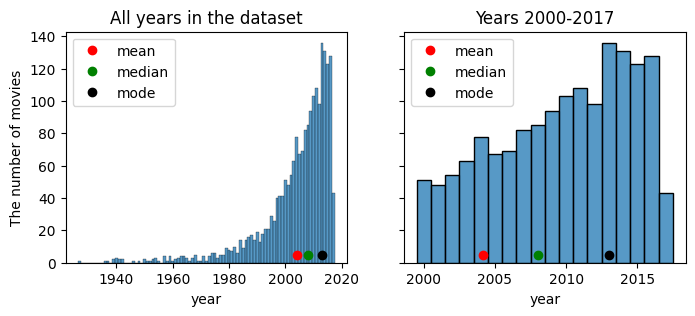

In [4]:
# set up figure with two plots
figure, axes = plt.subplots(1, 2, figsize=(8,3), sharey=True)

# plot histograms, use discrete=True to have each year in one bin
sns.histplot(data=movies, x='year', discrete=True, ax=axes[0])
sns.histplot(x=movies.query('year>=2000')['year'], discrete=True, ax=axes[1])

# titles and axis labels
axes[0].set_ylabel("The number of movies")
axes[0].set_title('All years in the dataset')
axes[1].set_title('Years 2000-2017')

# compute three summary statics, set up their color and label
stats = [{'label':'mean', 'value':movies['year'].mean(), 'color':'red'},
         {'label':'median', 'value':movies['year'].median(), 'color':'green'},
         {'label':'mode', 'value':movies['year'].mode(), 'color':'black'}]
# add dots for all statistics to both plots (at y=5)
for a in axes:
  for s in stats:
    a.plot(s['value'], 5, 'o', color=s['color'], label=s['label'])
  a.legend()

pass

* Functions `mean` and `median` can be applied to a whole table, in which case the summary of every numerical column will be computed.
* With `axis=1` we can compute means or medians in rows.

In [5]:
display(Markdown("**`movies.mean(numeric_only=True)`:**"), movies.mean(numeric_only=True))
display(Markdown("**`movies.median(numeric_only=True)`:**"), movies.median(numeric_only=True))

**`movies.mean(numeric_only=True)`:**

year            2.004145e+03
budget          5.510894e+07
revenue         1.985651e+08
runtime         1.126559e+02
vote_average    6.629673e+00
vote_count      1.704642e+03
dtype: float64

**`movies.median(numeric_only=True)`:**

year                 2008.0
budget           38000000.0
revenue         122200000.0
runtime               109.0
vote_average            6.6
vote_count           1092.0
dtype: float64

### Properties of the measures

* If we apply linear transformation $a\cdot x_i +b$ with the same constants $a$ and $b$ to all values $x_i$, mean, median and mode will be also transformed in the same way.
  * This corresponds e.g. to the change in the units of measurement (grams vs kilograms, degrees C vs degrees F)
* Mean can be heavily influenced by outliers.
  * Mean of 800, 1000, 1100, 1200, 1800, 2000 and 30000 is 5414.3, median 1200.
  * Mean of 800, 1000, 1100, 1200, 1800, 2000 and 10000 is 2557.1, median 1200.
* Therefore we often prefer median (e.g. median salary).


## Quantiles, percentiles and quartiles (kvantily, percentily, kvartily)

* Median is the middle value in a sorted order.
* Therefore about 50% of values are smaller and 50% larger.
* For a different percentage $p$, the $p$-th **percentile** is at position roughly $(p/100)\cdot n$ in the sorted order of values.
* Similarly **quantile** (in [Pandas](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.quantile.html)), but we give fraction between 0 and 1 rather than percentage.
* Specifically **quartiles** are three values $Q_1$, $Q_2$ and $Q_3$ that split input data into quarters.
  * Therefore, $Q_2$ is the median.
* Many definitions exist regarding situations when the desired fraction falls between two values (we can take lower, higher, mean, weighted mean etc).



### Computation in Pandas

* Function [`quantile`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.quantile.html) gets a single value between 0 and 1 or a list of values and returns corresponding quantiles. 
* To get quantiles for 0.1, 0.2, ..., 0.9, we generate a regular sequence of values using [`np.arange`](https://numpy.org/doc/stable/reference/generated/numpy.arange.html).

In [6]:
display(Markdown("**Median:**"), movies['year'].median())
display(Markdown("**Quantile for 0.5:**"), movies['year'].quantile(0.5))
display(Markdown("**All quartiles:**"), movies['year'].quantile([0.25, 0.5, 0.75]))
display(Markdown("**With step 0.1:**"), movies['year'].quantile(np.arange(0.1, 1, 0.1)))

**Median:**

2008.0

**Quantile for 0.5:**

2008.0

**All quartiles:**

0.25    2000.0
0.50    2008.0
0.75    2013.0
Name: year, dtype: float64

**With step 0.1:**

0.1    1988.8
0.2    1998.0
0.3    2002.0
0.4    2005.0
0.5    2008.0
0.6    2010.0
0.7    2012.0
0.8    2014.0
0.9    2015.0
Name: year, dtype: float64

The code below plots the quartiles highlighted in a histogram.

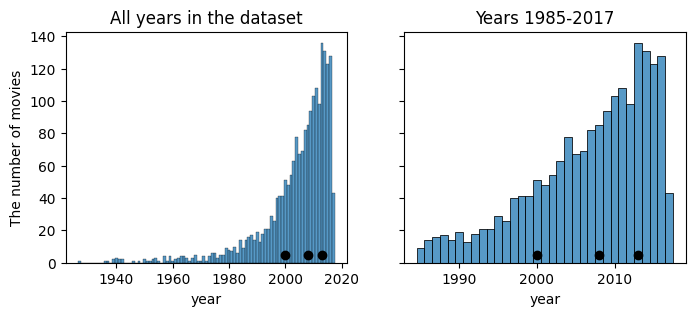

In [7]:
# setup histograms
figure, axes = plt.subplots(1, 2, figsize=(8,3), sharey=True)
sns.histplot(data=movies, x='year', discrete=True, ax=axes[0])
sns.histplot(x=movies.query('year>=1985')['year'], discrete=True, ax=axes[1])
axes[0].set_ylabel("The number of movies")
axes[0].set_title('All years in the dataset')
axes[1].set_title('Years 1985-2017')

# compute and display quartiles
quartiles = movies['year'].quantile([0.25, 0.5, 0.75])
for a in axes:
    a.plot(quartiles, [5] * len(quartiles), 'o', color='black')                 
pass

* The code below illustrates how the [`quantile`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.quantile.html) function works when returning quantiles which do not correspond to a single input value.
* Optional parameter `interpolation` accepts values `‘linear’ (default), ‘lower’, ‘higher’, ‘midpoint’, ‘nearest’`.
* Imagine the lowest element at quantile 0, the highest element at quantile 1 and the rest evenly spaced between. The quantile at position between two elements is influenced only by its two neighbors.
* For example in a list [0,10,20,100] is 0 at p=0, 10 at p=1/3. Quantile for p=0.25 is by default linear interpolation between these two numbers, i.e. 7.5.

In [8]:
a = pd.Series([0, 100])
b = pd.Series([0, 10, 20, 30, 100])
c = pd.Series([0, 10, 20, 100])
quantiles = [0.01, 0.25, 0.5, 0.75]
display(Markdown(f"**Quantiles for {list(a)}**"), a.quantile(quantiles))
display(Markdown(f"**Quantiles for {list(b)}**"), b.quantile(quantiles))
display(Markdown(f"**Quantiles for {list(c)}**"), c.quantile(quantiles))
display(Markdown(f"**Quantiles for {list(c)} with `interpolation='lower'`**"), 
        c.quantile(quantiles, interpolation='lower'))

**Quantiles for [0, 100]**

0.01     1.0
0.25    25.0
0.50    50.0
0.75    75.0
dtype: float64

**Quantiles for [0, 10, 20, 30, 100]**

0.01     0.4
0.25    10.0
0.50    20.0
0.75    30.0
dtype: float64

**Quantiles for [0, 10, 20, 100]**

0.01     0.3
0.25     7.5
0.50    15.0
0.75    40.0
dtype: float64

**Quantiles for [0, 10, 20, 100] with `interpolation='lower'`**

0.01     0
0.25     0
0.50    10
0.75    20
dtype: int64

## Measures of variability (miery variability)

* Values in the sample may be close to their mean or median, or they can spread widely.
* It is important to consider how representative is the mean or median of the whole set.

Examples of measures:

* Range of values from **minimum** to **maximum** (sensitive to outliers).
* **Interquantile range IQR (kvartilové rozpätie)**: range between $Q_1$ and $Q_3$ (contains the middle half of the data).
* Variance and standard deviation (described next).


### Variance and standard deviation (rozptyl a smerodajná odchýlka)

**Variance**

* For each value in the sample compute its difference from the mean and square it: $(x_i-\bar{x})^2$.
* After squaring, we get non-negative values (and squares are easier to work with mathematically than absolute values).
* Variance is the mean of these squares, but we divide by $n-1$ rather than $n$:

$$s^2 = \frac{\sum_{i=1}^n (x_i-\bar{x})^2}{n-1}$$

* We divide by $n-1$ rather than $n$, because we would otherwise underestimate the true variance of the underlying population (more in the statistics course).
* For large $n$, the difference between dividing by $n$ and $n-1$ is negligible.

**Standard deviation**

* Square root of the variance
$$s=\sqrt{s^2}$$
* It is expressed in the same units as the original values (variance is in units squared).

**Properties**

* Larger variance and standard deviation mean that data are spread farther from the mean
* If we apply linear transformation $a\cdot x_i +b$ with the same constants $a$ and $b$ to all values $x_i$:
  * Neither variance nor standard deviation change with $b$.
  * Variance is multipled by $a^2$, standard deviation by $|a|$.
* These measures are strongly influenced by outliers:
  * For 800, 1000, 1100, 1200, 1800, 2000, 30000 st. dev. is 10850.0, IQR 850.
  * For 800, 1000, 1100, 1200, 1800, 2000, 10000 st. dev. is 3310.5,  IQR 850.


### Computation in Pandas

We can use functions [`min`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.min.html), [`max`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.max.html), [`std`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.std.html), [`var`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.var.html), which work similarly to `mean`.

In [9]:
display(Markdown("**Minimum**"), movies['year'].min())
display(Markdown("**Maximum**"), movies['year'].max())
display(Markdown("**Mean**"), movies['year'].mean())
display(Markdown("**Variance**"), movies['year'].var())
display(Markdown("**Standard deviation**"), movies['year'].std())
q1 = movies['year'].quantile(0.25)
q3 = movies['year'].quantile(0.75)
display(Markdown("**Q1, Q3 and interquantile range:**"), q1, q3, q3-q1)


**Minimum**

1927

**Maximum**

2017

**Mean**

2004.1449487554905

**Variance**

161.2714600681735

**Standard deviation**

12.699270060447313

**Q1, Q3 and interquantile range:**

2000.0

2013.0

13.0

## Outliers (odľahlé hodnoty)

* Outliers are the values which are far from the typical range of values.
* These can be either extreme phenomena or results of errors in measumement or data processing.
* In data analysis, it is important to check these outliers.
* If they represent errors, it might be useful to remove them.
* They can also represent interesting anomalies.
* Different definitions of outliers may be appropriate in different situations.
* The criterion by statistician John Tukey is often used:
  * Outliers are the values outside of the range  $Q_1-k\cdot IQR, Q_3+k\cdot IQR$, e.g. for $k=1.5$.
* In our example 800, 1000, 1100, 1200, 1800, 2000, 30000:
  * $Q_1=1050$, $Q_3=1900$, $IQR=850$.
  * $Q_1-1.5\cdot IQR = -225$, $Q_3+1.5\cdot IQR = 3175$.
  * Outliers are values smaller than $-225$ or larger than $3175$; here only $30000$.
  * The range of outliers is not influenced if we change the outlier.

### Computation in Pandas

* The code below finds outliers in the `year` column.
* We compute the lower and upper thresholds manually from quartiles.
* Then we use `query` to select rows and count how many there are.
* Function [`count`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.count.html) counts the values in a Series or columns of a DataFrame, ignoring missing values.

In [10]:
# get quartiles and iqr
q1 = movies['year'].quantile(0.25)
q3 = movies['year'].quantile(0.75)
iqr = q3 - q1
# compute thresholds for outliers
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr
# count outliers
count = movies.query('year < @lower or year > @upper')['year'].count()
# print results
display(Markdown(f"**Outliers outside of range:** [{lower}, {upper}]"))
display(Markdown(f"**Outlier count:** {count}"))
display(Markdown(f"**Total count:** {movies['year'].count()}"))

**Outliers outside of range:** [1980.5, 2032.5]

**Outlier count:** 112

**Total count:** 2049

## Boxplot (krabicový graf)

* A plot developed by Mary Eleanor Hunt Spear and John Tukey 
* For a single numerical variable shows the **five-number summary** consisting of the minimum, $Q_1$, median ($Q_2$), $Q_3$ and the maximum.
* Median is shown as a thick line, $Q_1$ and $Q_3$ as a box and minimum and maximum as "whiskers".
* Outliers are often excluded from the whiskers and shown as individual points.
* Summaries of different samples are often compared in a single boxplot.
* Boxplots allow clear comparison of basic characteristics.

### Boxplots in Seaborn

* We use [`boxplot`](https://seaborn.pydata.org/generated/seaborn.boxplot.html) finction from Seaborn.
* Below is a simple horizontal boxplot of the `year` column.
* Recall that quartiles are 2000, 2008 and 2013, minimum 1927, maximum 2017, outliers outside of [1980.5, 2032.5].

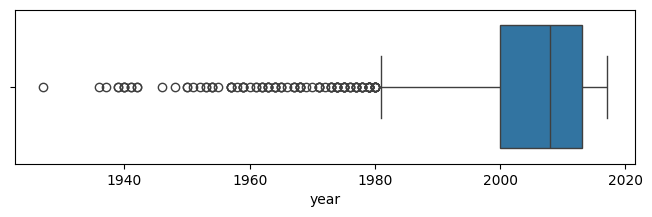

In [11]:
axes = sns.boxplot(data=movies, x='year')
axes.figure.set_size_inches(8,2)

* Below is a vertical boxplot of the `year` column split into groups according to language.
* This is achieved by specifying both `x` and `y` options.

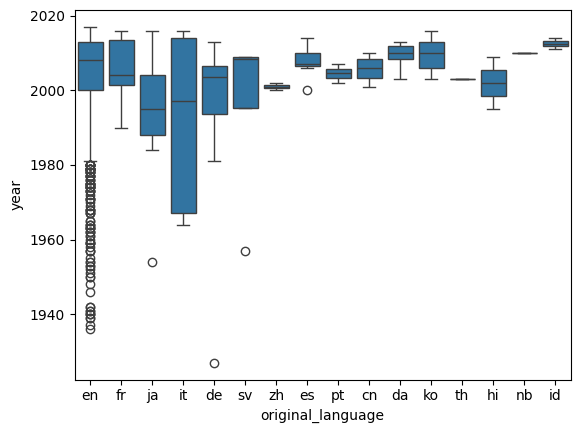

In [12]:
sns.boxplot(data=movies, x='original_language', y='year')
pass

* Below we draw a striplot on top of the boxplot. 
* This allows us to see both individual data points and the summary.
* Here it does not work very well for `en`, better suited for smaller datasets.

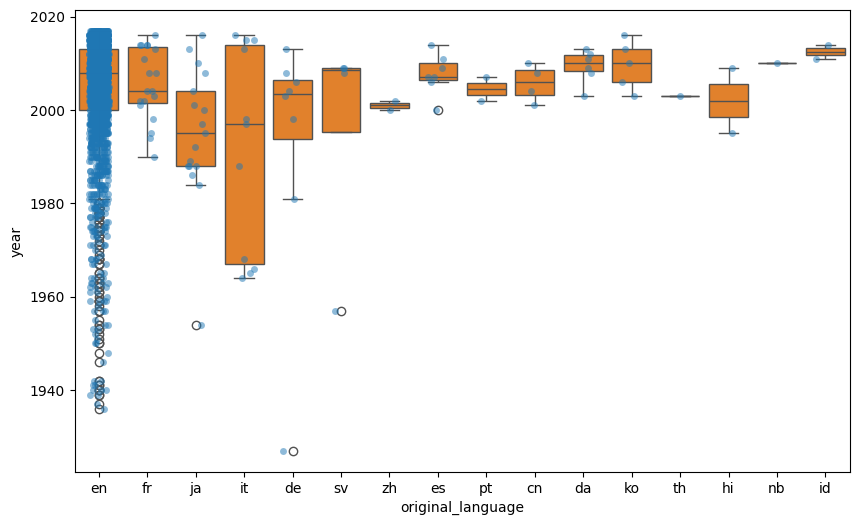

In [13]:
axes = sns.boxplot(data=movies, x='original_language', y='year', color='C1')
sns.stripplot(data=movies, x='original_language', y='year', color='C0', 
              alpha=0.5, size=5, jitter=0.2)
axes.figure.set_size_inches(10,6)
pass

## Quick overview of a data set: `describe` in Pandas

Function [`describe`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html) gives a quick overview of a data set with many statistics described today.

In [14]:
movies.describe()

,year,budget,revenue,runtime,vote_average,vote_count
count,2049.000000,1.959000e+03,1.965000e+03,2049.000000,2049.000000,2049.000000
mean,2004.144949,5.510894e+07,1.985651e+08,112.655930,6.629673,1704.642265
std,12.699270,5.313966e+07,2.330287e+08,24.760379,0.771652,1607.894196
min,1927.000000,1.000000e+00,1.500000e+01,7.000000,4.000000,501.000000
25%,2000.000000,1.600000e+07,5.288202e+07,97.000000,6.100000,709.000000
50%,2008.000000,3.800000e+07,1.222000e+08,109.000000,6.600000,1092.000000
75%,2013.000000,7.500000e+07,2.502000e+08,124.000000,7.200000,2000.000000
max,2017.000000,3.800000e+08,2.787965e+09,705.000000,9.100000,14075.000000


* By default `describe` only considers numerical columns.
* Other columns can be included by `include='all'`.
* Different statistics reported for categorical columns (`unique`, `top`, `freq`).

In [15]:
movies.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
title,2049,2018,Beauty and the Beast,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year,2049.0,NaN,NaN,NaN,2004.144949,12.69927,1927.0,2000.0,2008.0,2013.0,2017.0
budget,1959.0,NaN,NaN,NaN,55108939.696274,53139663.860699,1.0,16000000.0,38000000.0,75000000.0,380000000.0
revenue,1965.0,NaN,NaN,NaN,198565134.284478,233028732.941663,15.0,52882018.0,122200000.0,250200000.0,2787965087.0
original_language,2049,16,en,1958,NaN,NaN,NaN,NaN,NaN,NaN,NaN
runtime,2049.0,NaN,NaN,NaN,112.65593,24.760379,7.0,97.0,109.0,124.0,705.0
release_date,2049,1740,2014-12-25,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
vote_average,2049.0,NaN,NaN,NaN,6.629673,0.771652,4.0,6.1,6.6,7.2,9.1
vote_count,2049.0,NaN,NaN,NaN,1704.642265,1607.894196,501.0,709.0,1092.0,2000.0,14075.0
overview,2049,2049,"Led by Woody, Andy's toys live happily in his ...",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Correlation (korelácia)

* We are often interested in relationships among different variables (data columns).
* We will see two correlation coefficients that measure strength of such relationships.
* Beware: **correlation does not imply causation**.
  * If electricity consumption grows in a very cold weather, there might be **cause-and-effect** relationship: the cold weather is causing people to use more electricity for heating.
  * If healthier people tend to be happier, which is the cause and which is effect?
  * Both studied variables can be also influenced by some third, unknown factor. For example, within a year, deaths by drowning increase with increased ice cream consumption. Both increases are spurred by warm weather.
  * The observed correlation can be just a coincidence, see the [Redskins rule](https://en.wikipedia.org/wiki/Redskins_Rule).

### Pearson correlation coefficient
* It measures linear relationship between two variables.
* Consider pairs of values $(x_1,y_1),\dots, (x_n,y_n)$, where $(x_i,y_i)$ are two different features of the same object.
$$r = \frac{\sum_{i=1}^n (x_i-\bar{x})(y_i-\bar{y})}{\sqrt{\sum_{i=1}^n (x_i-\bar{x})^2}\sqrt{\sum_{i=1}^n (y_i-\bar{y})^2}}$$
* Or equivalently:
$$r = \frac{1}{n-1}\sum_{i=1}^n \left(\frac{x_i-\bar{x}}{s_x}\right)\left(\frac{y_i-\bar{y}}{s_y}\right).$$
* where $s_x$ is the standard deviation of variable $x$.
* Expression $(x_i-\bar{x})/s_x$ is called the **standard score** or **z-score**, and it tells us how many standard deviations above or below the mean value $x_i$ is.
* The product of $(x_i-\bar{x})/s_x$ and $(y_i-\bar{y})/s_y$ is positive if $x_i$ and $y_i$ lie on the same side of the respective means of $x$ and $y$ and negative if they lie on the opposite sides.



### Properties of Pearson correlation coefficient

**Values of Pearson correlation coefficient**

* The value of $r$ is always from interval $[-1,1]$.
* It is 1 if $y$ grows linearly with $x$, -1 of $y$ decreases linearly with increasing $x$. 
* Zero means no correlation.
* Values between 0 and 1 mean intermediate value of positive correlation, values between -1 and 0 negative correlation.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/3/34/Correlation_coefficient.png/640px-Correlation_coefficient.png">

<small>https://commons.wikimedia.org/wiki/File:Correlation_coefficient.png Kiatdd, CC BY-SA 3.0</small>

**Some cautions**

* Pearson correlation measures only linear relatioships (x and y in the bottom row have non-linear relationships but their correlation is 0).
* Pearson correlation does not depend on the slope of the best-fit line (see the middle row below).

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/d/d4/Correlation_examples2.svg/640px-Correlation_examples2.svg.png">

<small>https://commons.wikimedia.org/wiki/File:Correlation_examples2.svg public domain</small>

**Other properties**

* Pearson correlation does not change if we linearly scale each variable, i.e. $a x_i+b$, $c y_i+d$ (for $a,c>0$).
* Pearson correlation is symmetric.

**Linear regression**

* The process of finding the line best representing the relationship of $x$ and $y$ is called linear regression.
* It can be used in higher dimensions to predict one variable as a linear combination of many others.
* You will study linear regression in later courses, but we may draw regression lines in some plots.

### Spearman's rank correlation coefficient

* It can detect non-linear relationships.
* We first convert each variable into ranks:
  * Rank of $x_i$ is its index in the sorted order of $x_1,\dots,  x_n$.
  * Equal values get the same (average) rank.
  * For example, the ranks of 10, 0, 10, 20, 10, 20 are 3, 1, 3, 5.5, 3, 5.5.
* Then we compute Pearson correlation coefficent of the two rank sequences.
* Values of 1, -1 if $y$ monotonicaly increases or decreases with $x$.
* It is less sensitive to distant outliers (actual values of $x$ and $y$ are not important).

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/4/4e/Spearman_fig1.svg/360px-Spearman_fig1.svg.png">

<small>https://commons.wikimedia.org/wiki/File:Spearman_fig1.svg Skbkekas, CC BY-SA 3.0 </small>


### Computation in Pandas

Function [`corr`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html) computes correlation between all pairs of numerical columns. There is also a [version](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.corr.html) to compare two Series.

In our table, the highest Pearson correlation is 0.69 for pairs (`budget`, `revenue`), (`vote_count`, `revenue`)

In [16]:
movies.corr(numeric_only=True)

,year,budget,revenue,runtime,vote_average,vote_count
year,1.000000,0.279617,0.118325,-0.073865,-0.340791,0.118408
budget,0.279617,1.000000,0.690863,0.222595,-0.179042,0.472068
revenue,0.118325,0.690863,1.000000,0.252526,0.062549,0.690146
runtime,-0.073865,0.222595,0.252526,1.000000,0.310132,0.253497
vote_average,-0.340791,-0.179042,0.062549,0.310132,1.000000,0.328994
vote_count,0.118408,0.472068,0.690146,0.253497,0.328994,1.000000


With Spearman rank correlation, the correlation between `revenue` and `budget` remains similar, but correlation between `vote_count` and `budget` decreases from 0.69 to 0.56.

In [17]:
movies.corr(method='spearman', numeric_only=True)

,year,budget,revenue,runtime,vote_average,vote_count
year,1.000000,0.213075,0.020755,-0.032247,-0.270501,0.139107
budget,0.213075,1.000000,0.681560,0.242132,-0.278357,0.374016
revenue,0.020755,0.681560,1.000000,0.206116,-0.083111,0.563574
runtime,-0.032247,0.242132,0.206116,1.000000,0.318093,0.270584
vote_average,-0.270501,-0.278357,-0.083111,0.318093,1.000000,0.286933
vote_count,0.139107,0.374016,0.563574,0.270584,0.286933,1.000000


* Here we illustrate the regression line for `revenue` versus `vote_count`. 
* We use Seaborn [`regplot`](https://seaborn.pydata.org/generated/seaborn.regplot.html) to draw scatterplot together with the regression line.
* Points are made smaller and transparent by `scatter_kws={'alpha':0.7, 's':5}`.
* The plot on the right shows ranks instead of actual values.
* Ranks are computed using [rank](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.rank.html) function for Series.
* Pearson correlation coefficient probably benefits from outliers.

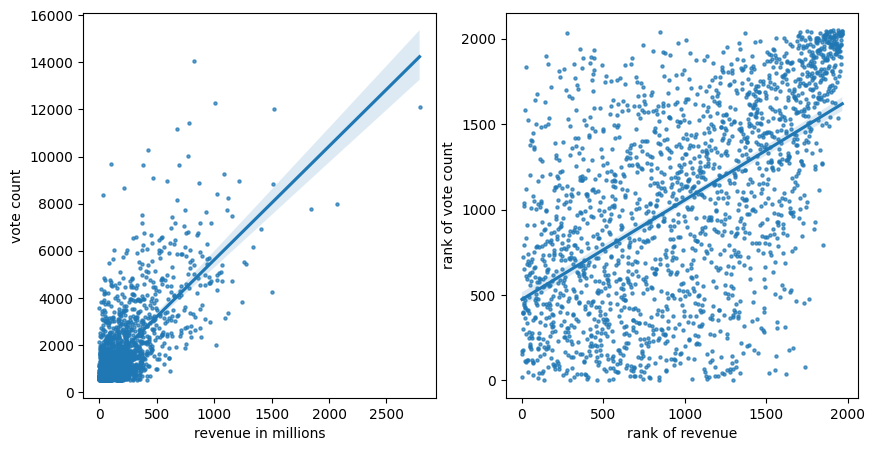

In [18]:
# figure with two plots
figure, axes = plt.subplots(1, 2, figsize=(10,5))
# plot of values
sns.regplot(x=movies['revenue'] / 1e6, y=movies['vote_count'], 
            ax=axes[0], scatter_kws={'alpha':0.7, 's':5})
axes[0].set_xlabel('revenue in millions')
axes[0].set_ylabel('vote count')
# compute ranks
revenue_rank = movies['revenue'].rank()
vote_count_rank = movies['vote_count'].rank()
# plot of ranks
sns.regplot(x=revenue_rank, y=vote_count_rank, 
            ax=axes[1], scatter_kws={'alpha':0.7, 's':5})
axes[1].set_xlabel('rank of revenue')
axes[1].set_ylabel('rank of vote count')
pass

## Anscombe's quartet and importance of visualization

* Anscombe's quartet are four artificial [data sets](https://matplotlib.org/stable/gallery/specialty_plots/anscombe.html) designed by [Francis Anscombe](https://doi.org/10.1080%2F00031305.1973.10478966).
* All have the same or very similar values of means and variances of both $x$ and $y$, Pearson correlation coefficient (0.816) and linear regression line.
* But visually we see each has a very different character.
* The bottom row illustrates the influence of outliers on correlation and regression.
* Overall this shows that plots give us a much better idea of the properties of a data set than simple numerical summaries.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/ec/Anscombe%27s_quartet_3.svg/640px-Anscombe%27s_quartet_3.svg.png">

<small>https://commons.wikimedia.org/wiki/File:Anscombe%27s_quartet_3.svg Schutz and Avenue, GPL</small>
https://en.wikipedia.org/wiki/Anscombe%27s_quartet



### Visual overview of a data set: `pairplot` in Seaborn

* Seaborn [`pairplot`](https://seaborn.pydata.org/generated/seaborn.pairplot.html) generates a matrix of plots for all numerical columns.
* The diagonal contains histograms of individual columns.
* Off-diagonal entries are scatterplots of two columns.
* Here only 3 columns shown for simpler examination.

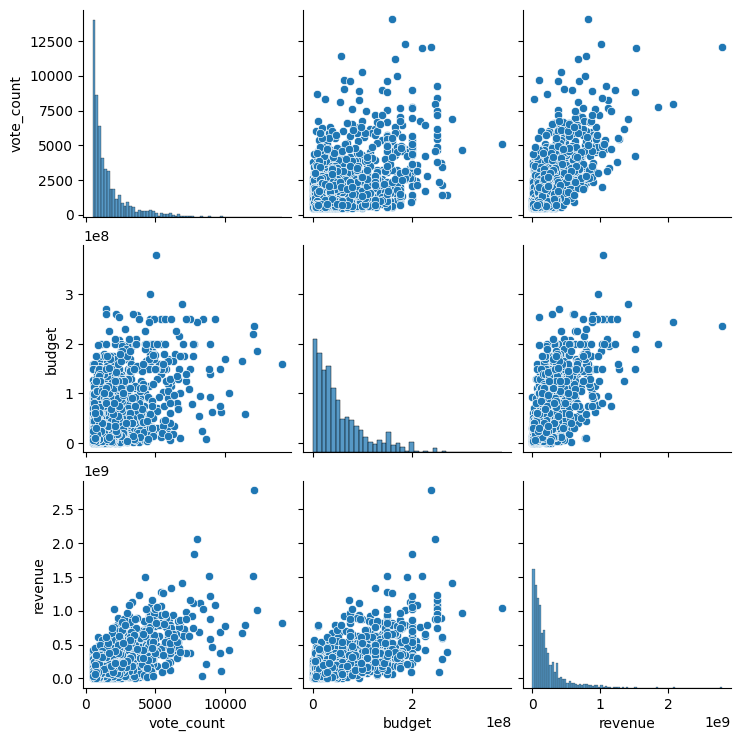

In [19]:
subset = movies.loc[:,  ['vote_count', 'budget', 'revenue']]
grid = sns.pairplot(subset, height=2.5)
pass

## Computing summaries of subsets of data: `groupby` from Pandas

* We have seen that Seaborn can create plots where data are split into groups according to a categorical variable.
* One example are boxplots, which we have seen today.
* How can we compute summary statistics for each such group in Pandas?


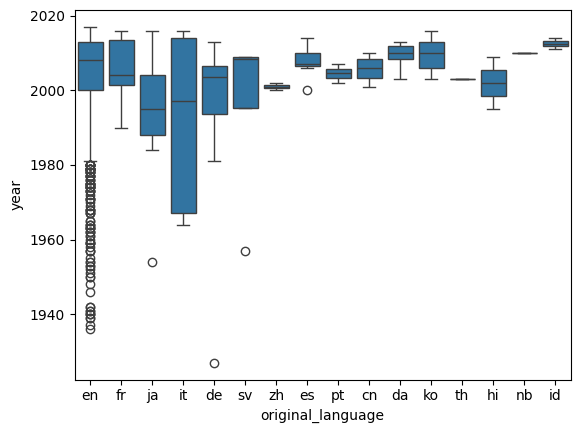

In [20]:
sns.boxplot(data=movies, x='original_language', y='year')
pass

* Pandas DataFrame supports function `groupby` which splits the table into groups based on values of some column.
* We can apply a summary statistics function on each group.
* Below we compute medians of all numerical columns for each language and show the first 5 languages.

In [21]:
movies.groupby('original_language').median(numeric_only=True).head()

,year,budget,revenue,runtime,vote_average,vote_count
original_language,,,,,,
cn,2006.0,12902809.0,39388380.0,108.5,7.2,762.5
da,2010.0,10000000.0,16740418.0,119.0,6.8,867.5
de,2003.5,6250000.0,70000000.0,129.0,7.6,669.0
en,2008.0,40000000.0,126397819.0,109.0,6.6,1126.0
es,2007.0,2000000.0,30448000.0,118.0,7.6,797.0


* We can also apply `describe` on the `groupby` groups.
* Here only two numerical columns of the original table are shown.

In [22]:
subset = movies.loc[:, ['original_language', 'year', 'budget']]
subset.groupby('original_language').describe().head()

year                                                   \
                    count         mean        std     min      25%     50%   
original_language                                                            
cn                    4.0  2005.750000   4.031129  2001.0  2003.25  2006.0   
da                    6.0  2009.333333   3.614784  2003.0  2008.25  2010.0   
de                    8.0  1992.500000  28.127262  1927.0  1993.75  2003.5   
en                 1958.0  2004.296731  12.536805  1936.0  2000.00  2008.0   
es                    7.0  2007.714286   4.386125  2000.0  2006.50  2007.0   

                                    budget                              \
                       75%     max   count          mean           std   
original_language                                                        
cn                 2008.50  2010.0     3.0  1.487280e+07  4.479793e+06   
da                 2011.75  2013.0     5.0  1.344000e+07  1.236964e+07   
de                 2006.50  2013.0     8.0  1.822372e+07  3.062354e+07   
en                 2013.00  2017.0  1891.0  5.663720e+07  5.339483e+07   
es                 2010.00  2014.0     5.0  7.500000e+06  8.046738e+06   

                                                                                
                          min         25%         50%         75%          max  
original_language                                                               
cn                 11715578.0  12309193.5  12902809.0  16451404.5   20000000.0  
da                  3800000.0   7400000.0  10000000.0  11000000.0   35000000.0  
de                  1530000.0   4100000.0   6250000.0  15084937.5   92620000.0  
en                        1.0  18000000.0  40000000.0  80000000.0  380000000.0  
es                  1500000.0   2000000.0   2000000.0  13000000.0   19000000.0

## Summary

We have seen several summary statistics:

* mean, median, mode
* percentiles, quantiles, quartiles
* min, max, interquantile range, variance, standard deviation
* Pearson and Spearman correlation

Visualization:

* boxplot
* scatter plots with regression lines 
* pairplot

Pandas:

* functions for computing statistics, `describe`
* `groupby`
* next week: more Pandas

More details in a statistics course.
